In [1]:
# 페션 데이터 읽어들이고, 훈련/테스트 데이터셋 분류
# 모델생성
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# 패션데이터 읽어들이기
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 정규화하기
train_scaled = train_input / 255.0
# 차원축소 하지 않기
# 훈련 및 검증 데이터셋으로 분류하기(8:2)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,
                                                                      test_size=0.2,random_state=42)

print(train_scaled.shape,train_target.shape)
print(val_scaled.shape,val_target.shape)


(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


In [2]:
# 신경망 모델 및 신경망층 생성 함수

def model_fn(add_layer = None):
    model = keras.Sequential()
    # 전처리층 : 1차원으로 만들기
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    # 은닉층 : 훈련에 관여
    model.add(keras.layers.Dense(100,activation="relu"))
    
    if add_layer:
        model.add(add_layer)
    # 출력층
    model.add(keras.layers.Dense(10,activation="softmax"))
    
    return model

In [3]:
# 반복 5번 수행하는 모델 생성
model5 = model_fn()
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 모델 설정하기
model5.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
model5

In [5]:
# verbose : 0~2의 값 사용하여 출력결과 선택가능
# 1 : 전체 다 보여주기
# 2 : 결과값만 보여주기(진행 bar 안보임)
# 0 : 아무것도 안보여주기(속도를 향상시키지만, 결과같 확인 어렵)
history5 = model5.fit(train_scaled,train_target,epochs=5,verbose=1)
history5

Epoch 1/5
1500/1500 [==============================] - 2s 831us/step - loss: 0.5251 - accuracy: 0.8156
Epoch 2/5
1500/1500 [==============================] - 1s 832us/step - loss: 0.3937 - accuracy: 0.8583
Epoch 3/5
1500/1500 [==============================] - 1s 846us/step - loss: 0.3586 - accuracy: 0.8711
Epoch 4/5
1500/1500 [==============================] - 1s 749us/step - loss: 0.3359 - accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 1s 764us/step - loss: 0.3231 - accuracy: 0.8838


In [6]:
history5 = model5.fit(train_scaled,train_target,epochs=5,verbose=0)
history5

In [7]:
history5 = model5.fit(train_scaled,train_target,epochs=5,verbose=2)
history5

Epoch 1/5
1500/1500 - 1s - loss: 0.2731 - accuracy: 0.9043 - 890ms/epoch - 593us/step
Epoch 2/5
1500/1500 - 1s - loss: 0.2664 - accuracy: 0.9067 - 886ms/epoch - 591us/step
Epoch 3/5
1500/1500 - 1s - loss: 0.2616 - accuracy: 0.9079 - 911ms/epoch - 607us/step
Epoch 4/5
1500/1500 - 1s - loss: 0.2575 - accuracy: 0.9120 - 937ms/epoch - 625us/step
Epoch 5/5
1500/1500 - 1s - loss: 0.2524 - accuracy: 0.9130 - 938ms/epoch - 625us/step


In [8]:
# 훈련결과 확인하기
print("반복횟수 : ", history5.epoch)
print("손실계수/정확도 : ", history5.history)
print("훈련결과 키워드 : ", history5.history.keys())

반복횟수 :  [0, 1, 2, 3, 4]
손실계수/정확도 :  {'loss': [0.2731095254421234, 0.26635393500328064, 0.26159828901290894, 0.2575286328792572, 0.2523570656776428], 'accuracy': [0.9042708277702332, 0.9066874980926514, 0.9079375267028809, 0.9120208621025085, 0.9129791855812073]}
훈련결과 키워드 :  dict_keys(['loss', 'accuracy'])


In [9]:
# 출력 디자인
for i, epoch in enumerate(history5.epoch):
    print("epoch =",i,"|","loss = ",history5.history['loss'][i],"|","accuracy = ",history5.history['accuracy'][i])
# round() 써서 깔끔하게

epoch = 0 | loss =  0.2731095254421234 | accuracy =  0.9042708277702332
epoch = 1 | loss =  0.26635393500328064 | accuracy =  0.9066874980926514
epoch = 2 | loss =  0.26159828901290894 | accuracy =  0.9079375267028809
epoch = 3 | loss =  0.2575286328792572 | accuracy =  0.9120208621025085
epoch = 4 | loss =  0.2523570656776428 | accuracy =  0.9129791855812073


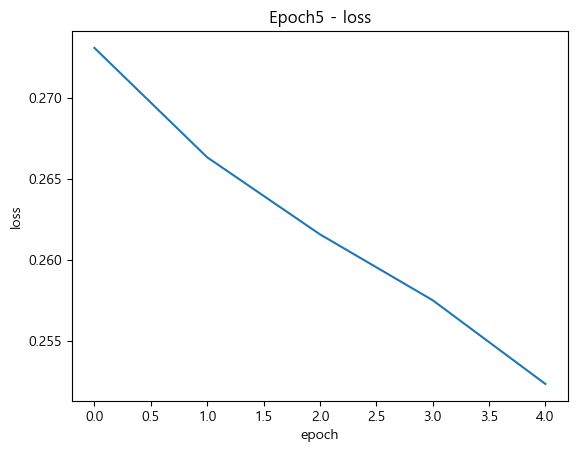

In [10]:
# 손실(loss)곡선 그리기
# 손실률(손실계수)의 변화 확인가능
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history5.epoch, history5.history["loss"])
plt.title("Epoch5 - loss")
plt.xlabel("epoch")
plt.ylabel("loss")

# 그래프저장
plt.savefig("./image/01_Epoch5Loss", dpi=300)
plt.show()

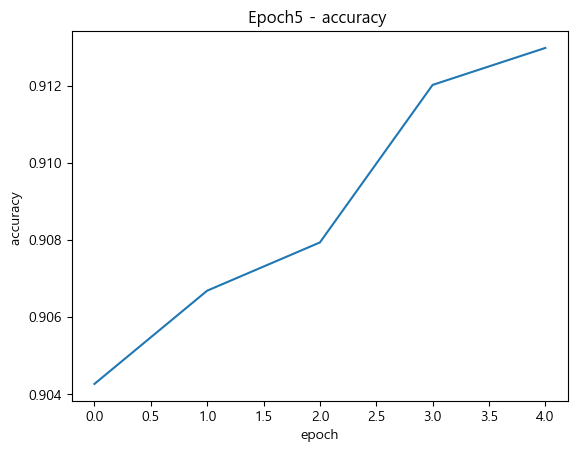

In [11]:
# 정확도(accuracy )곡선 그리기
# 정확도의 변화 확인가능
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history5.epoch, history5.history["accuracy"])
plt.title("Epoch5 - accuracy ")
plt.xlabel("epoch")
plt.ylabel("accuracy ")

# 그래프저장
plt.savefig("./image/01_Epoch5accuracy ", dpi=300)
plt.show()

In [12]:
# 새로 모델 생성하고 반복횟수 20회로 훈련 시킨 후 손실곡선과 정확도 곡선 그리기

Epoch 1/20
1500/1500 [==============================] - 1s 733us/step - loss: 0.5358 - accuracy: 0.8127
Epoch 2/20
1500/1500 [==============================] - 1s 786us/step - loss: 0.3955 - accuracy: 0.8582
Epoch 3/20
1500/1500 [==============================] - 1s 781us/step - loss: 0.3587 - accuracy: 0.8717
Epoch 4/20
1500/1500 [==============================] - 1s 781us/step - loss: 0.3360 - accuracy: 0.8792
Epoch 5/20
1500/1500 [==============================] - 1s 813us/step - loss: 0.3226 - accuracy: 0.8850
Epoch 6/20
1500/1500 [==============================] - 1s 789us/step - loss: 0.3097 - accuracy: 0.8893
Epoch 7/20
1500/1500 [==============================] - 1s 779us/step - loss: 0.3013 - accuracy: 0.8950
Epoch 8/20
1500/1500 [==============================] - 1s 795us/step - loss: 0.2904 - accuracy: 0.8975
Epoch 9/20
1500/1500 [==============================] - 1s 922us/step - loss: 0.2848 - accuracy: 0.9000
Epoch 10/20
1500/1500 [==============================] - 1s 893u

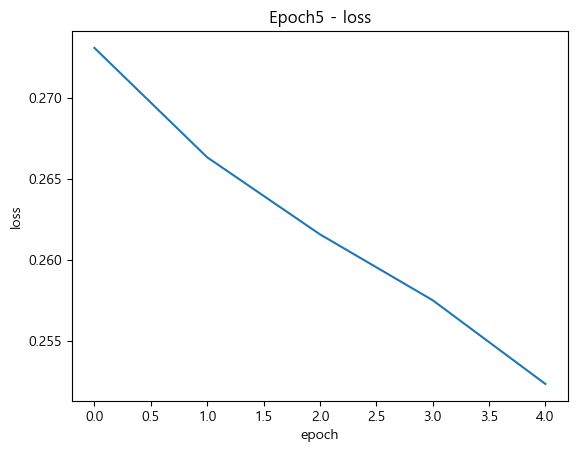

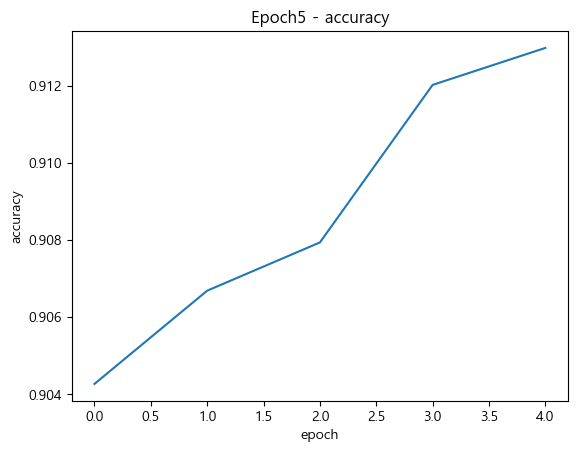

In [13]:
# 반복 20번 수행하는 모델 생성
model20 = model_fn()

# 모델 설정하기
model20.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")

# 훈련
history20 = model20.fit(train_scaled,train_target,epochs=20,verbose=1)

# 곡선그리기
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

kind = ["loss","accuracy"]

for i in kind:
    plt.plot(history5.epoch, history5.history[i])
    plt.title("Epoch5 - {}".format(i))
    plt.xlabel("epoch")
    plt.ylabel(i)

    # 그래프저장
    plt.savefig("./image/01_Epoch5{}".format(i), dpi=300)
    plt.show()

In [14]:
# 모델 훈련 및 검증을 동시에 수행
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
# 훈련과 검증을 동시에 훈련
history = model.fit(train_scaled,train_target,epochs=20,verbose=1,
                   validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 2s 930us/step - loss: 0.5285 - accuracy: 0.8147 - val_loss: 0.4422 - val_accuracy: 0.8421
Epoch 2/20
1500/1500 [==============================] - 1s 889us/step - loss: 0.3900 - accuracy: 0.8600 - val_loss: 0.3711 - val_accuracy: 0.8712
Epoch 3/20
1500/1500 [==============================] - 1s 881us/step - loss: 0.3548 - accuracy: 0.8730 - val_loss: 0.3764 - val_accuracy: 0.8710
Epoch 4/20
1500/1500 [==============================] - 1s 907us/step - loss: 0.3342 - accuracy: 0.8799 - val_loss: 0.4270 - val_accuracy: 0.8583
Epoch 5/20
1500/1500 [==============================] - 1s 913us/step - loss: 0.3194 - accuracy: 0.8861 - val_loss: 0.3666 - val_accuracy: 0.8799
Epoch 6/20
1500/1500 [==============================] - 1s 843us/step - loss: 0.3086 - accuracy: 0.8900 - val_loss: 0.3507 - val_accuracy: 0.8845
Epoch 7/20
1500/1500 [==============================] - 1s 887us/step - loss: 0.2995 - accuracy: 0.8937 - val_loss: 0.3639 -

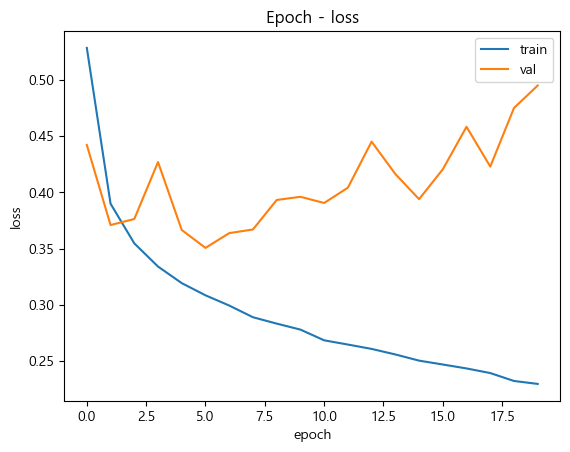

In [15]:
# 훈련 및 검증에 대한 손실곡선을 하나의 그래프로 그리기
# 손실(loss)곡선 그리기
# 손실률(손실계수)의 변화 확인가능
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["loss"],label="train")
plt.plot(history.epoch, history.history["val_loss"],label="val")
plt.title("Epoch - loss")
plt.xlabel("epoch")
plt.ylabel("loss")


# 그래프저장
plt.savefig("./image/01_Epoch5Loss", dpi=300)
plt.legend()
plt.show()

In [22]:
# model_fn()함수 이용해서 모델 생성 : 모델 변수 model
# 옵티마이저 adam 알고리즘으로 모델 설정하기
# 훈련과 검증데이터로 훈련시키기 : 훈련결과 변수 -> history
# 신경망 모델 및 신경망층 생성 함수

def model_fn(add_layer = None):
    model = keras.Sequential()
    # 전처리층 : 1차원으로 만들기
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    # 은닉층 : 훈련에 관여
    model.add(keras.layers.Dense(100,activation="relu"))
    
    if add_layer:
        model.add(add_layer)
    # 출력층
    model.add(keras.layers.Dense(10,activation="softmax"))
    
    return model



In [23]:
model = model_fn()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5270 - accuracy: 0.8147 - val_loss: 0.4613 - val_accuracy: 0.8419
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3977 - accuracy: 0.8600 - val_loss: 0.3836 - val_accuracy: 0.8672
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3540 - accuracy: 0.8715 - val_loss: 0.3697 - val_accuracy: 0.8656
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3287 - accuracy: 0.8816 - val_loss: 0.3468 - val_accuracy: 0.8748
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3067 - accuracy: 0.8867 - val_loss: 0.3382 - val_accuracy: 0.8790
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2925 - accuracy: 0.8926 - val_loss: 0.3425 - val_accuracy: 0.8746
Epoch 7/20
1500/1500 [==============================] - 1s 943us/step - loss: 0.2822 - accuracy: 0.8955 - val_loss: 0.3429 - val_accurac

In [25]:
# 훈련에 대한 결과
history5.history
history20.history
# 훈련 및 검증에 대한 결과
history.history

{'loss': [0.5270097255706787,
  0.3977430760860443,
  0.3539527654647827,
  0.328685462474823,
  0.306674599647522,
  0.29254016280174255,
  0.28217819333076477,
  0.26630353927612305,
  0.2580239772796631,
  0.24870702624320984,
  0.238383486866951,
  0.23214180767536163,
  0.22450150549411774,
  0.2205723077058792,
  0.21214936673641205,
  0.20646817982196808,
  0.20277011394500732,
  0.19760139286518097,
  0.19027085602283478,
  0.18586018681526184],
 'accuracy': [0.8146874904632568,
  0.8600208163261414,
  0.8715208172798157,
  0.8816041946411133,
  0.8866666555404663,
  0.8926041722297668,
  0.895479142665863,
  0.9025208353996277,
  0.9041041731834412,
  0.9083750247955322,
  0.9118333458900452,
  0.9138333201408386,
  0.9165208339691162,
  0.9181249737739563,
  0.9214791655540466,
  0.9227499961853027,
  0.9240833520889282,
  0.926604151725769,
  0.9282291531562805,
  0.9301041960716248],
 'val_loss': [0.461289644241333,
  0.383632093667984,
  0.36971819400787354,
  0.3468091487

In [ ]:
# 훈련 또는 훈련/검증 결과 출력 함수 만들기
# 훈련만 수행한 경우 
# epoch=19, train_loss=0.2305, train_accuracy=0.9215 이렇게 출력
# 훈련 및 검증 동시
# epoch=19, train_loss=0.2305, train_accuracy=0.9215, val_loss=0.23, val_acuuracy=0.323 이렇게 출력
# 함수에 전달하는 값 : history

In [61]:
def findRes(history):
    for i in history.epoch:
        if len(history.history) > 2 :
            print("epoch=",i,"train_loss=",history.history["loss"][len(history.epoch)-1],
                  "train_accuracy=",history.history["accuracy"][len(history.epoch)-1],
                 "val_loss=",history.history["val_loss"][len(history.epoch)-1],
                 "val_accuracy=",history.history["val_accuracy"][len(history.epoch)-1])
        else:
            print("epoch=",i,"train_loss=",history.history["loss"][len(history.epoch)-1],
                  "train_accuracy=",history.history["accuracy"][len(history.epoch)-1])
def printAll_fn(p_history):
    for idx in p_history.epoch :
        msg = "epoch={},".format(idx)
        for k in p_history.history.keys():
            msg += "{}={}". format(k, round(p_history.history[k][idx], 4))
            
            
        print(msg)

In [62]:
printAll_fn(history)

epoch=0,loss=0.527accuracy=0.8147val_loss=0.4613val_accuracy=0.8419
epoch=1,loss=0.3977accuracy=0.86val_loss=0.3836val_accuracy=0.8672
epoch=2,loss=0.354accuracy=0.8715val_loss=0.3697val_accuracy=0.8656
epoch=3,loss=0.3287accuracy=0.8816val_loss=0.3468val_accuracy=0.8748
epoch=4,loss=0.3067accuracy=0.8867val_loss=0.3382val_accuracy=0.879
epoch=5,loss=0.2925accuracy=0.8926val_loss=0.3425val_accuracy=0.8746
epoch=6,loss=0.2822accuracy=0.8955val_loss=0.3429val_accuracy=0.8791
epoch=7,loss=0.2663accuracy=0.9025val_loss=0.3265val_accuracy=0.8844
epoch=8,loss=0.258accuracy=0.9041val_loss=0.3364val_accuracy=0.881
epoch=9,loss=0.2487accuracy=0.9084val_loss=0.3267val_accuracy=0.8857
epoch=10,loss=0.2384accuracy=0.9118val_loss=0.3199val_accuracy=0.8867
epoch=11,loss=0.2321accuracy=0.9138val_loss=0.328val_accuracy=0.8873
epoch=12,loss=0.2245accuracy=0.9165val_loss=0.3502val_accuracy=0.8821
epoch=13,loss=0.2206accuracy=0.9181val_loss=0.3278val_accuracy=0.8883
epoch=14,loss=0.2121accuracy=0.9215val

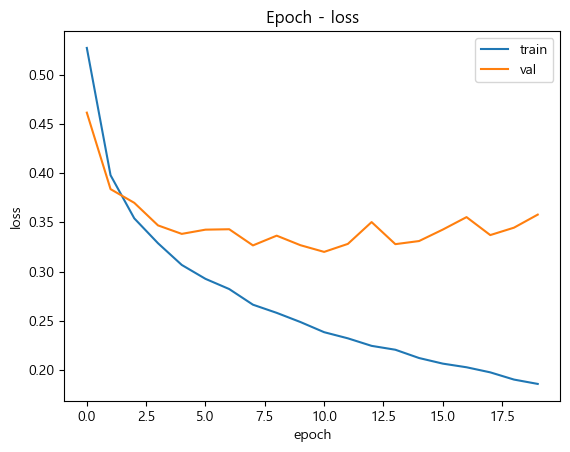

In [63]:
# history 결과를 이용하여 손실곡선 그리기
# 훈련 손실과 검증 손실 비교
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["loss"],label="train")
plt.plot(history.epoch, history.history["val_loss"],label="val")
plt.title("Epoch - loss")
plt.xlabel("epoch")
plt.ylabel("loss")


# 그래프저장
plt.savefig("./image/01_EpochLoss", dpi=300)
plt.legend()
plt.show()

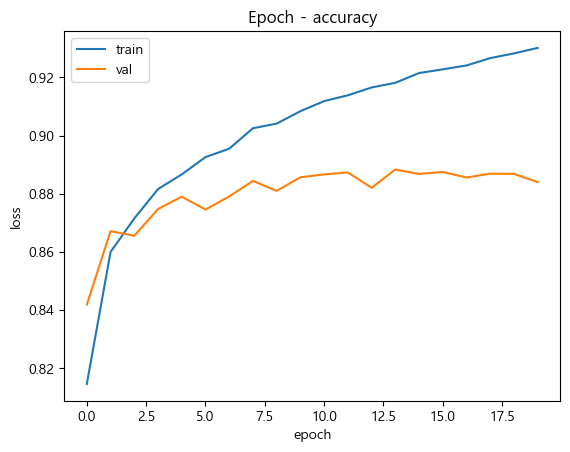

In [64]:
# 정확도 곡선
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["accuracy"],label="train")
plt.plot(history.epoch, history.history["val_accuracy"],label="val")
plt.title("Epoch - accuracy")
plt.xlabel("epoch")
plt.ylabel("loss")


# 그래프저장
plt.savefig("./image/01_Epochaccuracy", dpi=300)
plt.legend()
plt.show()

In [77]:
# 성능 규제 방법
# 드롭아웃(dropout)
# 성능 향상방법 중 한가지, 신경망에서 대표적 규제방법(전처리 계층으로 사용)
# 드롭아웃 전처리 계층 생성
# 0.3의 의미 : 3% 정도를 랜덤하게 드롭아웃 처리
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [78]:
# 모델 설정하기 : 컴파일
# 옵티마이저 adam사용
# 훈련 및 검증 동시 수행
# 훈련 및 검증에 대한 손실 곡선그리기
# 훈련 및 검증에 대한 정확도 곡선 그리기
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled,train_target,epochs=10,verbose=1,validation_data=(val_scaled,val_target))

Epoch 1/10
1500/1500 [==============================] - 1s 849us/step - loss: 0.5798 - accuracy: 0.7952 - val_loss: 0.4259 - val_accuracy: 0.8471
Epoch 2/10
1500/1500 [==============================] - 1s 790us/step - loss: 0.4342 - accuracy: 0.8440 - val_loss: 0.3857 - val_accuracy: 0.8609
Epoch 3/10
1500/1500 [==============================] - 1s 776us/step - loss: 0.3990 - accuracy: 0.8551 - val_loss: 0.3655 - val_accuracy: 0.8685
Epoch 4/10
1500/1500 [==============================] - 1s 773us/step - loss: 0.3786 - accuracy: 0.8625 - val_loss: 0.3708 - val_accuracy: 0.8660
Epoch 5/10
1500/1500 [==============================] - 1s 753us/step - loss: 0.3661 - accuracy: 0.8665 - val_loss: 0.3588 - val_accuracy: 0.8710
Epoch 6/10
1500/1500 [==============================] - 1s 753us/step - loss: 0.3487 - accuracy: 0.8715 - val_loss: 0.3431 - val_accuracy: 0.8748
Epoch 7/10
1500/1500 [==============================] - 1s 755us/step - loss: 0.3409 - accuracy: 0.8741 - val_loss: 0.3284 -

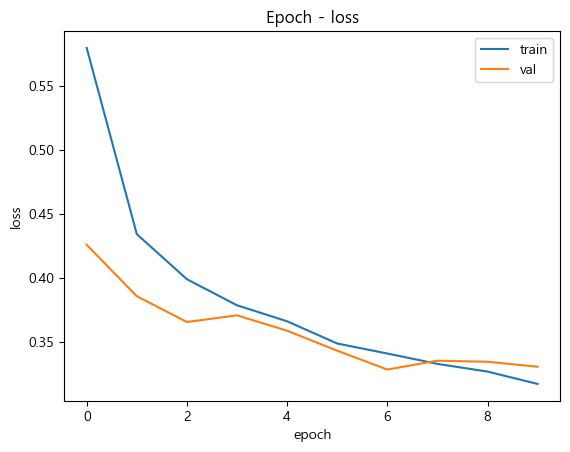

In [79]:
# history 결과를 이용하여 손실곡선 그리기
# 훈련 손실과 검증 손실 비교
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["loss"],label="train")
plt.plot(history.epoch, history.history["val_loss"],label="val")
plt.title("Epoch - loss")
plt.xlabel("epoch")
plt.ylabel("loss")


# 그래프저장
plt.savefig("./image/01_EpochLoss", dpi=300)
plt.legend()
plt.show()

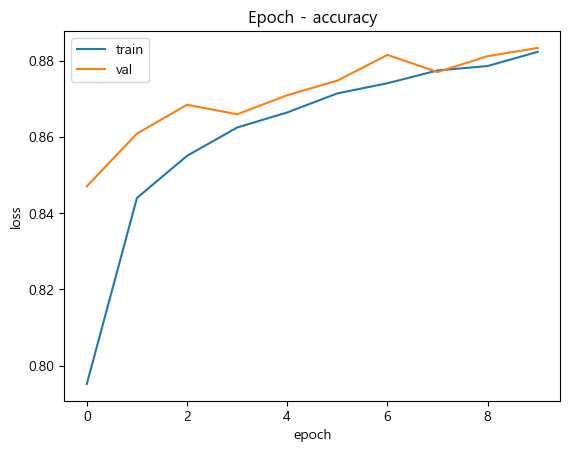

In [80]:
# 정확도 곡선
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["accuracy"],label="train")
plt.plot(history.epoch, history.history["val_accuracy"],label="val")
plt.title("Epoch - accuracy")
plt.xlabel("epoch")
plt.ylabel("loss")


# 그래프저장
plt.savefig("./image/01_Epochaccuracy", dpi=300)
plt.legend()
plt.show()

In [70]:
printAll_fn(history)

epoch=0,loss=0.6012accuracy=0.7899val_loss=0.429val_accuracy=0.8479
epoch=1,loss=0.4449accuracy=0.8412val_loss=0.3945val_accuracy=0.8554
epoch=2,loss=0.4084accuracy=0.8526val_loss=0.3654val_accuracy=0.8648
epoch=3,loss=0.3828accuracy=0.8594val_loss=0.364val_accuracy=0.8667
epoch=4,loss=0.37accuracy=0.8659val_loss=0.3529val_accuracy=0.8701
epoch=5,loss=0.3584accuracy=0.8701val_loss=0.3544val_accuracy=0.8708
epoch=6,loss=0.3457accuracy=0.8723val_loss=0.3333val_accuracy=0.8792
epoch=7,loss=0.3373accuracy=0.8754val_loss=0.3327val_accuracy=0.8776
epoch=8,loss=0.3303accuracy=0.8772val_loss=0.3252val_accuracy=0.8811
epoch=9,loss=0.3248accuracy=0.8789val_loss=0.3319val_accuracy=0.8818
epoch=10,loss=0.3185accuracy=0.8826val_loss=0.3293val_accuracy=0.8788
epoch=11,loss=0.3127accuracy=0.884val_loss=0.3369val_accuracy=0.8802
epoch=12,loss=0.3067accuracy=0.8856val_loss=0.335val_accuracy=0.8774
epoch=13,loss=0.3032accuracy=0.8874val_loss=0.3179val_accuracy=0.8852
epoch=14,loss=0.2999accuracy=0.8874v

In [82]:
# 모델 저장 방법 1
# 훈련에 사용된 가중치(weight) 및 절편 값만 저장
# 읽어들일 떄는 load_weight() 함수 이용
model.save_weights("./model/model_weights.h5")

In [84]:
# 모델 저장 방법 2
# 훈련 모델 자체(가중치 및 절편 포함한 모든 속성)를 저장
# 읽어들일 때는 load_model() 함수 사용
model.save("./model/model_whole.h5")

In [85]:
# save_weight()로 저장한 모델 사용하기
# 먼저 모델 구조를 만들어야함
# 생성한 모델에 저장한 모델을 읽어들여서 저장된 가중치와 절편 적용
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [87]:
# 생성된 모델에 저장한 가중치와 절편 적용
model.load_weights("./model/model_weights.h5")

In [93]:
# 예측
# 1차원 데이터로 만들기 

model.predict(val_scaled)
len(model.predict(val_scaled))
len(model.predict(val_scaled)[0])

import numpy as np
# np.argmax() : 가장 큰 값 추출하는 함수
# axis=1 : 컬럼 단위 추출
val_labels = np.argmax(model.predict(val_scaled),axis=1)
print(val_labels)
print(len(val_labels))
print(val_target)

[8 8 7 ... 8 8 6]
12000
[8 8 7 ... 8 8 1]


In [108]:
# 정확도와 오답률을 계산
o, x =  0, 0
for i in range(len(val_target)):
    if val_target[i] == val_labels[i]:
        o += 1
    else:
        x += 1
print(o, x)
print(o/len(val_target)*100, x/len(val_target)*100)

10601 1399
88.34166666666667 11.658333333333333


In [109]:
# save()로 저장된 모델 읽기
model = keras.models.load_model("./model/model_whole.h5")
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 487us/step - loss: 0.3306 - accuracy: 0.8834


[0.33057329058647156, 0.8834166526794434]

In [110]:
# 성능향상 방법
# 콜백함수
# modelcheckpoint() 콜백함수
# epoch 실행시 마다 [훈련모델]을 저장하는 함수
# save_best_only = True : 앞서 저장된 훈련모델의 [훈련손실]이 [검증손실]보다 향상된 경우에만 자동 저장
# save_best_only=False : epoch맏다 훈련모델을 저장
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
# 콜백함수 정의
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best_model.h5",save_best_only=True)
# 훈련 시 콜백함수 속성 지정하기
model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target),
         callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 1s 839us/step - loss: 0.5887 - accuracy: 0.7916 - val_loss: 0.4398 - val_accuracy: 0.8379
Epoch 2/20
1500/1500 [==============================] - 1s 777us/step - loss: 0.4404 - accuracy: 0.8402 - val_loss: 0.3928 - val_accuracy: 0.8540
Epoch 3/20
1500/1500 [==============================] - 1s 782us/step - loss: 0.4001 - accuracy: 0.8527 - val_loss: 0.3705 - val_accuracy: 0.8645
Epoch 4/20
1500/1500 [==============================] - 1s 793us/step - loss: 0.3819 - accuracy: 0.8595 - val_loss: 0.3568 - val_accuracy: 0.8702
Epoch 5/20
1500/1500 [==============================] - 1s 773us/step - loss: 0.3652 - accuracy: 0.8666 - val_loss: 0.3447 - val_accuracy: 0.8740
Epoch 6/20
1500/1500 [==============================] - 1s 775us/step - loss: 0.3527 - accuracy: 0.8717 - val_loss: 0.3442 - val_accuracy: 0.8730
Epoch 7/20
1500/1500 [==============================] - 1s 769us/step - loss: 0.3405 - accuracy: 0.8745 - val_loss: 0.3500 -

In [111]:
# 저장된 best 모델 불러들이기 
model = keras.models.load_model("./model/best_model.h5")
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 492us/step - loss: 0.3147 - accuracy: 0.8857


[0.31468111276626587, 0.8857499957084656]

In [116]:
# EarlyStopping() 콜백 함수

# 모델생성
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
# ModelCheckpoint() 콜백함수
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best_model.h5",save_best_only=True)

# EarlyStopping() 콜백함수 정의
# 성능규제 함수로 사용됨 : 조기 종료 시키는 기능
# 일정 epoch 동안 [검증손실]이 향상되지 않으면 훈련을 멈춤
# 선택적으로 최상의 모델을 복원할 수 있음(restore_best_weights=True)
# ModelCheckpoint() 콜백함수와 함께 사용하면 효율적 훈련
# 모델이 향상되지 않으면 훈련이 자동으로 중지됨으로 epoch의 숫자를 크게 지정해도됨
# 과대적합이 시작되기 전 훈련을 미리 종료
# patience : 중단하기 전 기다려야하는 epoch개수, 종료 시정 이후 지정된 숫자만큼 훈련을 더 진행, 더 진행해도 손실률에 변화 없으면 훈련 종료
# restore_best_weights : 가장 낮은 검증손실을 낸 모델의 하이퍼파라미터 값들로 수정, 최상의 가중치를 복원하지 않아도됨(모델 그대로 사용)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

# 훈련시 콜백함수 속성 지정
history = model.fit(train_scaled,train_target,epochs=50,verbose=1,validation_data=(val_scaled,val_target),
         callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/50
1500/1500 [==============================] - 1s 915us/step - loss: 0.5912 - accuracy: 0.7910 - val_loss: 0.4415 - val_accuracy: 0.8382
Epoch 2/50
1500/1500 [==============================] - 1s 993us/step - loss: 0.4415 - accuracy: 0.8407 - val_loss: 0.3869 - val_accuracy: 0.8600
Epoch 3/50
1500/1500 [==============================] - 1s 785us/step - loss: 0.4031 - accuracy: 0.8537 - val_loss: 0.3597 - val_accuracy: 0.8677
Epoch 4/50
1500/1500 [==============================] - 1s 765us/step - loss: 0.3804 - accuracy: 0.8606 - val_loss: 0.3598 - val_accuracy: 0.8673
Epoch 5/50
1500/1500 [==============================] - 1s 774us/step - loss: 0.3656 - accuracy: 0.8664 - val_loss: 0.3505 - val_accuracy: 0.8717
Epoch 6/50
1500/1500 [==============================] - 1s 755us/step - loss: 0.3535 - accuracy: 0.8707 - val_loss: 0.3516 - val_accuracy: 0.8700
Epoch 7/50
1500/1500 [==============================] - 1s 772us/step - loss: 0.3423 - accuracy: 0.8739 - val_loss: 0.3350 -

In [117]:
# epoch 확인
early_stopping_cb.stopped_epoch-1

9

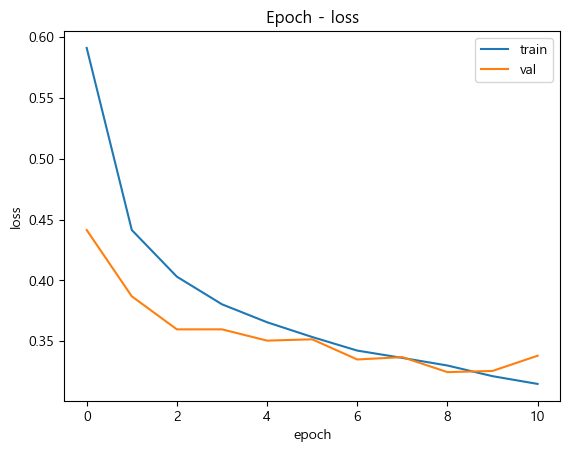

In [118]:
# 훈련 검증 손실 곡선 
# history 결과를 이용하여 손실곡선 그리기
# 훈련 손실과 검증 손실 비교
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["loss"],label="train")
plt.plot(history.epoch, history.history["val_loss"],label="val")
plt.title("Epoch - loss")
plt.xlabel("epoch")
plt.ylabel("loss")


# 그래프저장
plt.savefig("./image/01_EpochLoss", dpi=300)
plt.legend()
plt.show()

In [119]:
# 평가
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 479us/step - loss: 0.3246 - accuracy: 0.8832


[0.3245738446712494, 0.8831666707992554]